In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mushroom-classification/mushrooms.csv


In [12]:
df = pd.read_csv('/kaggle/input/mushroom-classification/mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [13]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [15]:
df_plot = df['class'].value_counts()
df_plot

class
e    4208
p    3916
Name: count, dtype: int64

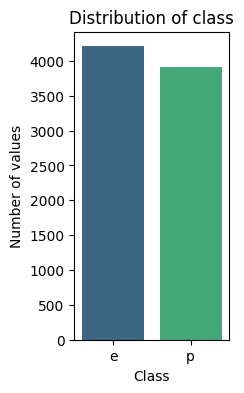

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(2, 4))
sns.barplot(x=df_plot.index, y=df_plot.values, palette='viridis')
plt.xticks(rotation=0)
plt.xlabel('Class')
plt.ylabel('Number of values')
plt.title('Distribution of class')
plt.show()

In [17]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
data_hot = pd.DataFrame(one_hot.fit_transform(df))
data_hot.index = df.index
data_hot

,0,1,2,3,4,5,6,7,8,9,...,109,110,111,112,113,114,115,116,117,118
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8120,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8121,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8122,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, f1_score


X = df.drop(columns='class', axis=1)
y = df['class'].map({'e': 0, 'p':1})

X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                     train_size=0.8,
                                                     shuffle=True)

model = Pipeline(steps=[
    ('encoder', OneHotEncoder()),
    ('sclaer', StandardScaler(with_mean=False)),
    ('model', SVC(kernel='poly', degree=3, coef0=10, C=20))
])


model.fit(X_train, y_train)
preds = model.predict(X_valid)

print(f'F1 Score:', f1_score(y_valid, preds))
print(f'MAE:', mean_absolute_error(y_valid, preds))

F1 Score: 1.0
MAE: 0.0


In [20]:
from sklearn.feature_selection import chi2
import numpy as np

encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

chi2_scores, p_values = chi2(X_encoded, y)

# Ordenar por importancia
sorted_scores = sorted(zip(chi2_scores, encoder.get_feature_names_out()), reverse=True)
for score, col in sorted_scores[:10]:
    print(col, score)


odor_n 2836.187954176688
odor_f 2321.0623084780386
stalk-surface-above-ring_k 1986.4084940843877
stalk-surface-below-ring_k 1914.3713894833327
gill-color_b 1856.849846782431
gill-size_n 1636.6068327567395
spore-print-color_h 1560.1875607849838
ring-type_l 1392.6373850868235
ring-type_p 1213.9952194289326
bruises_t 1194.2773520082696


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score


X = df.drop(columns='class', axis=1)
y = df['class'].map({'e': 0, 'p': 1})


X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, train_size=0.8, shuffle=True, random_state=0
)


model = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore')),   
    ('scaler', StandardScaler(with_mean=False)),           
    ('model', SVC(kernel='poly', degree=3, coef0=10, C=20))
])


model.fit(X_train, y_train)
preds = model.predict(X_valid)

# Evaluación
print(f'Accuracy: {accuracy_score(y_valid, preds):.4f}')
print(f'F1 Score: {f1_score(y_valid, preds):.4f}')


F1 Score: 1.0
MAE: 0.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3362
           1       1.00      1.00      1.00      3138

    accuracy                           1.00      6500
   macro avg       1.00      1.00      1.00      6500
weighted avg       1.00      1.00      1.00      6500



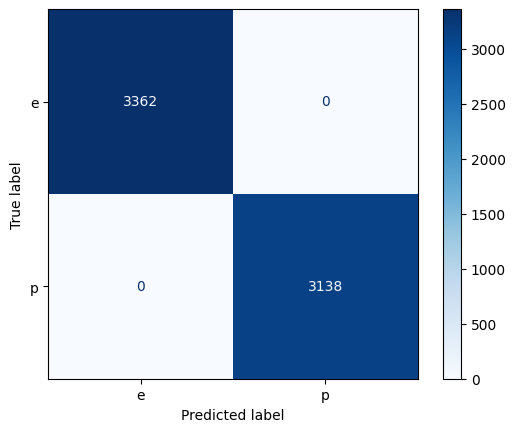

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

cm = confusion_matrix(y_valid, preds)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['e', 'p'])
disp.plot(cmap='Blues')  # Puedes cambiar el color

print(classification_report(y_valid, preds))

We can conclude that the target is highly predictable with the features we have, because this features describe very well the target